<a href="https://colab.research.google.com/github/shubhicode7/Amazone-dataset/blob/main/Amazone_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# 📥 Step 2: Load the Dataset
df = pd.read_csv("/content/Amazone dataset.csv")
df = df[['reviews.text', 'reviews.rating']].dropna()

In [ ]:
# 🏷️ Step 3: Sentiment Labeling
def get_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['reviews.rating'].apply(get_sentiment)

In [ ]:
# 🧹 Step 4: Clean the Text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['reviews.text'].apply(clean_text)
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))

In [ ]:
# 🧠 Step 5: Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']

In [ ]:
# 🔀 Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 🤖 Step 7: Train Model (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# 🧪 Step 8: Make Predictions
y_pred = model.predict(X_test)

In [ ]:
# 📊 Step 9: Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        15
     neutral       1.00      0.48      0.65        21
    positive       0.88      1.00      0.94       200

    accuracy                           0.89       236
   macro avg       0.63      0.49      0.53       236
weighted avg       0.84      0.89      0.85       236



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


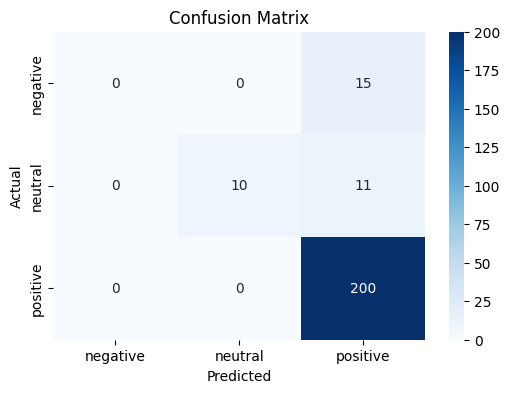

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
pip install dash plotly pandas scikit-learn

In [ ]:
import pandas as pd
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import plotly.express as px
import dash
from dash import dcc, html, Input, Output

In [ ]:
# 🔹 Load and preprocess data
df = pd.read_csv("/content/Amazone dataset.csv")
df = df[['reviews.text', 'reviews.rating']].dropna()

def get_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'
df['sentiment'] = df['reviews.rating'].apply(get_sentiment)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['reviews.text'].apply(clean_text)
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in ENGLISH_STOP_WORDS]))



In [ ]:
# 🔹 Vectorization & Model Training
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# 🔹 Initialize Dash app
app = dash.Dash(__name__)
app.title = "Sentiment Dashboard"

In [ ]:
# 🔹 Layout
app.layout = html.Div([
    html.H1("Amazon Reviews Sentiment Dashboard", style={'textAlign': 'center'}),

    dcc.Graph(id='sentiment-pie'),
    dcc.Graph(id='top-words-bar'),

    html.H4("Try Sentiment Prediction:"),
    dcc.Textarea(id='review-input', placeholder='Enter a review...', style={'width': '100%', 'height': 100}),
    html.Div(id='prediction-output', style={'marginTop': '10px', 'fontWeight': 'bold', 'fontSize': 20})
])

In [ ]:
pip install jupyter-dash

In [ ]:
import dash
app = dash.Dash(__name__)

In [ ]:
from jupyter_dash import JupyterDash
app = JupyterDash(__name__)

/usr/local/lib/python3.11/dist-packages/dash/dash.py:587: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



In [ ]:
@app.callback(
    Output('sentiment-pie', 'figure'),
    Output('top-words-bar', 'figure'),
    Output('prediction-output', 'children'),
    Input('review-input', 'value')
)
def update_dashboard(input_text):
    pie_fig = px.pie(df, names='sentiment', title='Sentiment Distribution')
    all_words = ' '.join(df['clean_text']).split()
    word_freq = pd.Series(all_words).value_counts().nlargest(20)
    bar_fig = px.bar(x=word_freq.index, y=word_freq.values, labels={'x': 'Word', 'y': 'Frequency'}, title='Top 20 Words')
    if input_text:
        cleaned = clean_text(input_text)
        cleaned = ' '.join([word for word in cleaned.split() if word not in ENGLISH_STOP_WORDS])
        vec = vectorizer.transform([cleaned])
        pred = model.predict(vec)[0]
        return pie_fig, bar_fig, f"Predicted Sentiment: {pred.capitalize()}"
    else:
        return pie_fig, bar_fig, ""

In [ ]:
!pip install -U jupyter-dash dash --quiet

In [ ]:
# Sample Data
df = pd.DataFrame({
    'Review Text': ["Great product", "Bad quality", "Excellent service", "Terrible experience"],
    'sentiment': ["positive", "negative", "positive", "negative"]
})
df['clean_text'] = df['Review Text'].str.lower()

# App
app = JupyterDash(__name__)
app.layout = html.Div([
    dcc.Input(id='review-input', type='text', placeholder='Enter review...'),
    html.Div(id='prediction-output'),
    dcc.Graph(id='sentiment-pie'),
    dcc.Graph(id='top-words-bar')
])

/usr/local/lib/python3.11/dist-packages/dash/dash.py:587: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



In [ ]:
print(df.head())
print(df.columns)

           Review Text sentiment           clean_text
0        Great product  positive        great product
1          Bad quality  negative          bad quality
2    Excellent service  positive    excellent service
3  Terrible experience  negative  terrible experience
Index(['Review Text', 'sentiment', 'clean_text'], dtype='object')


In [ ]:
def update_dashboard(input_text):
    print("Data size:", len(df))
    print("Columns:", df.columns)

In [ ]:
df['clean_text'] = df['clean_text'].fillna('').astype(str)

In [ ]:
app.run(debug=True)

<IPython.core.display.Javascript object>